![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/VC2.png)


<a href="https://drive.google.com/file/d/1rO_kMzUYWEIarRc_3sab-kH0upkhOn1D/view?usp=sharing"><img align="left"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>&nbsp; &nbsp;<a href="https://github.com/awangenh/vision"><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/05/GIT-open-in-github-blue-logo.png" alt="Open in Github" title="Open in Github"></a>&nbsp; &nbsp;<a href="https://codigos.ufsc.br/awangenh/vision"><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/05/GIT-open-in-gitlab-blue-logo.png" alt="Open in Gitlab" title="Open in Gitlab"></a>&nbsp; &nbsp;<a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/License-CC-BY-ND-4.0-orange.png" alt="Creative Commons 4.0 License" title="Creative Commons 4.0 License"></a>&nbsp; &nbsp; <a href=""><img align="left" src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Jupyter-Notebook-v.1.0-blue.png" alt="Jupyter Version" title="Jupyter Version"></a>&nbsp; &nbsp;<a href=""><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/Python-v.3.7-green.png" alt="Python Version" title="Python Version"></a>&nbsp; &nbsp;<a href=""><img align="left"  src="http://www.lapix.ufsc.br/wp-content/uploads/2019/04/fast.ai-v.1.0-red.png" alt="fast.ai Version" title="fast.ai Version"></a>

<small>Observe that, if you chose to *Open in Colab* you'll be redirected to read-only notebooks that you'll have to right-click on and chose to *Open  in Colab* again.</small>

### Cloning the ***Computer Vision*** repository from a Git

In [ ]:
# To clone from our personal Github mirror (may be out of sync):
!git clone https://github.com/awangenh/vision

In [ ]:
# To clone from UFSC's Institutional Gitlab (always the latest version):
!git clone https://codigos.ufsc.br/aldo.vw/vision

### Common Initializations

In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Test if your notebook is running on Google Colab
# You'll use this when choosing between doing interaction via ipywidgets or not. 
try:
  import google.colab
  _ON_COLAB = True
except:
  _ON_COLAB = False

print('Running on Google Colab = ', _ON_COLAB)

Running on Google Colab =  False


# Simple Filters

This section discusses simple filters. Some of these filter employ simple mathematical operations, such as mean or media, other employ simples convolutions, such as Gaussian, low-pass, high-pass or band-pass filters.

### Filters in OpenCV

OpenCV implements a huge palette of filters. You'll find some documentation on these pages:
- Methods: https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html
- Explanations: https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html

We will demonstrate a few here. OpenCV also allows you to develop any custom convolutional filter using  the OpenCV function [filter2D()](https://docs.opencv.org/3.4.3/d5/df1/group__imgproc__hal__functions.html#ga42c2468ab3a1238fbf48458c57169081) to create your own linear filters. Here's an official tutorial: https://docs.opencv.org/3.4.3/d4/dbd/tutorial_filter_2d.html.

Mathematical Morphology filters we will handle in a separate, specific notebook.

The **Median Blur** smoothes an image using the median filter with the $(\texttt{ksize} \times \texttt{ksize})$ aperture. Each channel of a multi-channel image is processed independently. Parameters:	

    src – input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    dst – destination array of the same size and type as src.
    ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

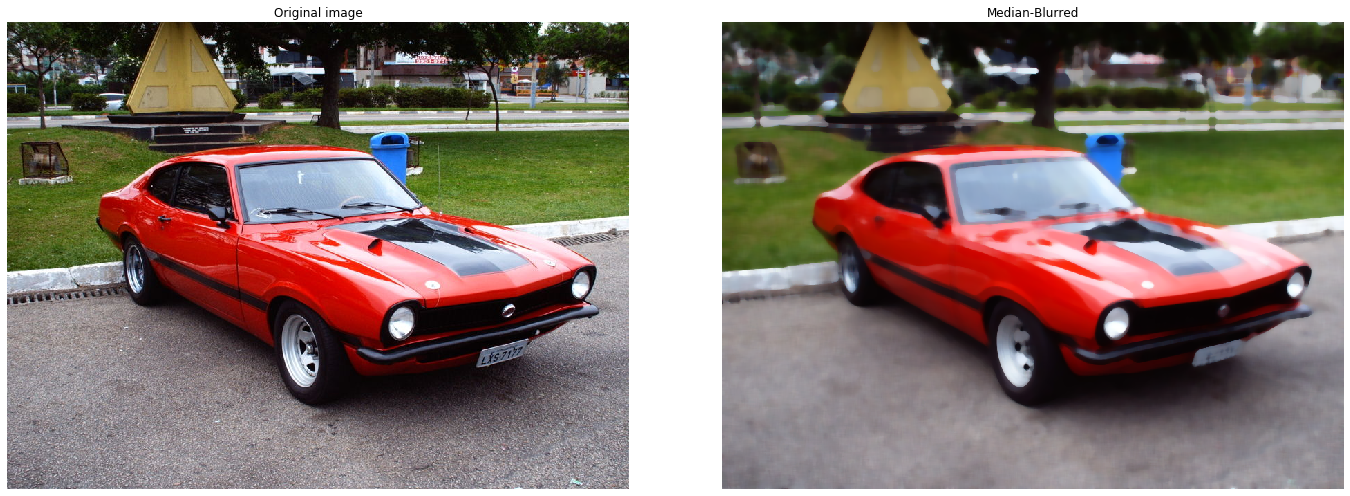

In [18]:
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import cv2

# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread("../data/car-01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def my_median_blur(ksize = 11):
    global image
    # The Median Filter smoothes an image using the median filter.
    shifted = cv2.medianBlur(image, ksize=ksize)

    fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original image')

    ax[1].imshow(shifted)
    ax[1].set_title('Median-Blurred')

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()


if _ON_COLAB:
    # Google Colab:
    my_median_blur(ksize = 11)
else:
    # Jupyter Notebook:
    interact_manual(my_median_blur, ksize = (1, 71, 2))

The **Mean Shift Filter** performs the initial step of a meanshift segmentation of an image. Parameters:	

    cv2.pyrMeanShiftFiltering(src, sp, sr[, dst[, maxLevel[, termcrit]]]) → dst
    src – The source 8-bit, 3-channel image.
    dst – The destination image of the same format and the same size as the source.
    sp – The spatial window radius.
    sr – The color window radius.
    maxLevel – Maximum level of the pyramid for the segmentation.
    termcrit – Termination criteria: when to stop meanshift iterations.


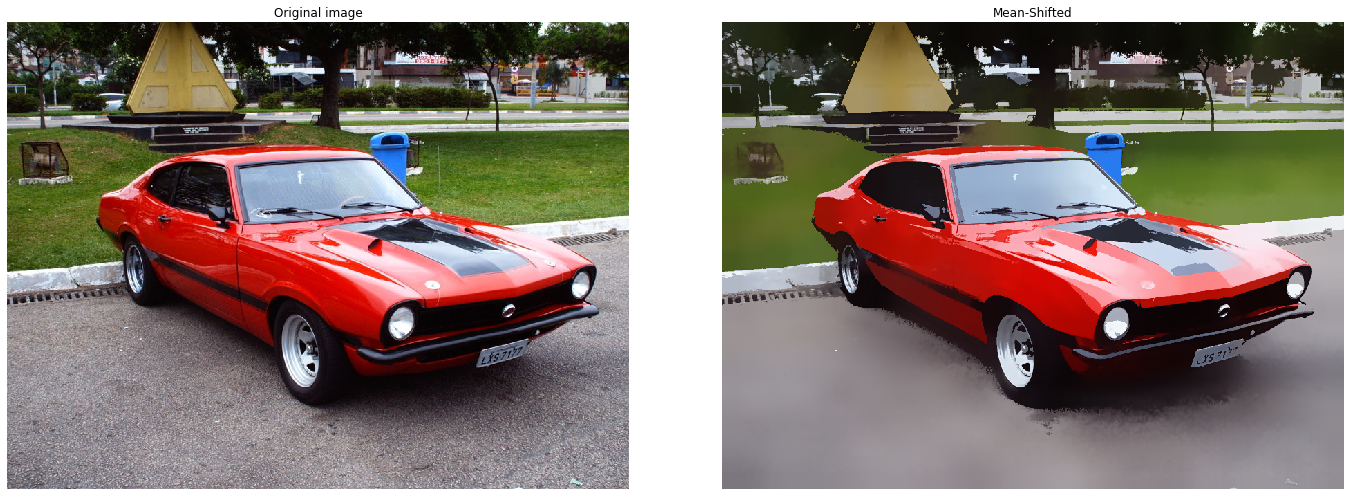

In [19]:
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import cv2

# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread("../data/car-01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def my_mean_sfift (spatialWindow = 21, colorWindow = 51):
    global image
    # The Mean Shift Filter performs the initial step of meanshift segmentation of an image.
    shifted = cv2.pyrMeanShiftFiltering(image, sp=spatialWindow, sr=colorWindow)

    fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original image')

    ax[1].imshow(shifted)
    ax[1].set_title('Mean-Shifted')

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

if _ON_COLAB:
    # Google Colab:
    my_mean_sfift (spatialWindow = 21, colorWindow = 51)
else:
    # Jupyter Notebook:
    interact_manual(my_mean_sfift, spatialWindow = (1, 51, 2), colorWindow = (1, 101, 2))

The **Gaussian filter** blurs an image: The function convolves the source image with the specified Gaussian kernel. Parameters:	

    src – input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    dst – output image of the same size and type as src.
    ksize – Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero’s and then they are computed from sigma* .
    sigmaX – Gaussian kernel standard deviation in X direction.
    sigmaY – Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX.
    borderType – pixel extrapolation method (see borderInterpolate for details).

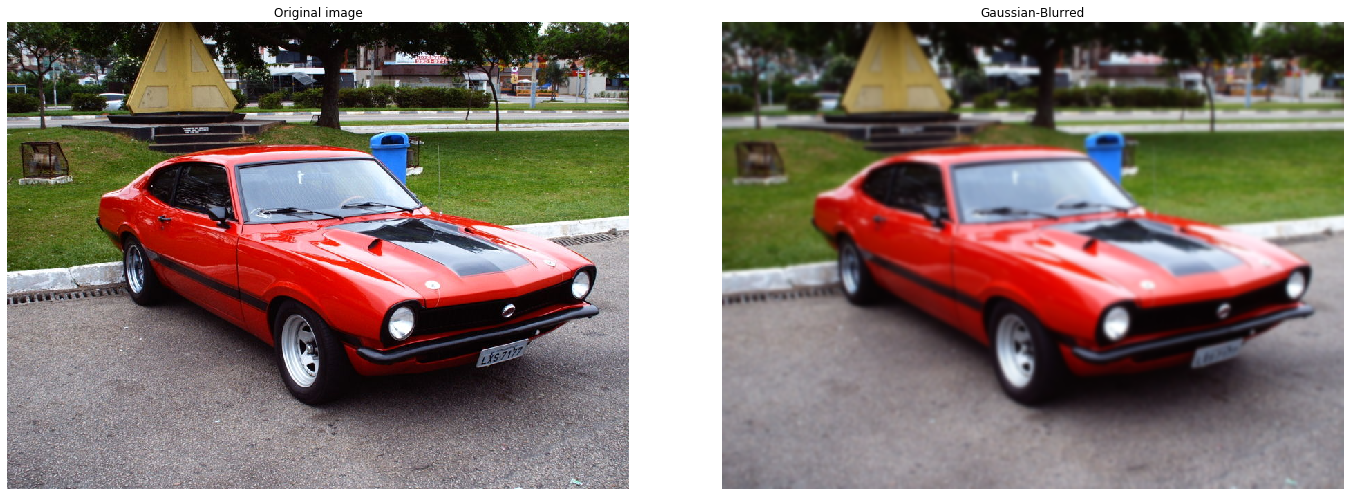

In [20]:
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import cv2
import copy

# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread("../data/car-01.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def my_gaussian_blur (ksize = 21, sigmaX = 0.5):
    # The Gaussian filter convolves the source image with the specified Gaussian kernel.
    blurred = cv2.GaussianBlur(image, ksize = (ksize, ksize), sigmaX = sigmaX)

    fig, axes = plt.subplots(nrows = 1,ncols=2, figsize=(20, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original image')

    ax[1].imshow(blurred)
    ax[1].set_title('Gaussian-Blurred')

    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()

if _ON_COLAB:
    # Google Colab:
    my_gaussian_blur (ksize = 21, sigmaX = 2.5)
else:
    # Jupyter Notebook:
    interact_manual(my_gaussian_blur, ksize = (1, 51, 2), sigmaX = (0.1, 10.0, 0.1))

# Advanced Filters

In this section we will discuss more advanced and refined filters. 

## Anisotropic Diffusion Filter



### National Library of Medicine Insight Segmentation and Registration Toolkit (ITK)

ITK (https://itk.org/) has a good implementation of teh Perona&Malik Anisotropic Diffusion Filter: https://itk.org/Doxygen/html/classitk_1_1GradientAnisotropicDiffusionImageFilter.html. ITK is an open-source, cross-platform system that provides developers with an extensive suite of software tools for image analysis.  Developed through extreme programming methodologies, ITK employs leading-edge algorithms for registering and segmenting multidimensional data.

Anisotropic diffusion examples can be found here: https://itk.org/ITKExamples/src/Filtering/AnisotropicSmoothing/ComputePeronaMalikAnisotropicDiffusion/Documentation.html

ITK is a standard, PyPi-distributed package. If you are running this notebook on the UFSC SeTIC teaching server, ITK will be already installed. If you're running this on Colab or elsewhere, ITK Python packages can be installed by running:

In [ ]:
!pip install itk

You can import the whole ITK suite by doing:

In [ ]:
import itk

ITK has its own image reading and handling methods, so the code using ITK will look different from your vanilla matplotlib/SciKit/OpenCV code:

In [ ]:

inputImage = "../data/ct-02.jpg"
outputImage = "../data/ct-02-diff.jpg"
numberOfIterations = 10
conductance = 1.

Dimension = 2
InputPixelType = itk.UC
InputImageType = itk.Image[InputPixelType, Dimension]
OutputPixelType = itk.F
OutputImageType = itk.Image[OutputPixelType, Dimension]

ReaderType = itk.ImageFileReader[InputImageType]
reader = ReaderType.New()
reader.SetFileName(inputImage)

CastFilterType = itk.CastImageFilter[InputImageType, OutputImageType]
castfilter = CastFilterType.New()
castfilter.SetInput(reader)

FilterType = itk.GradientAnisotropicDiffusionImageFilter[OutputImageType, OutputImageType]
gradientfilter = FilterType.New()
gradientfilter.SetInput(castfilter.GetOutput())
gradientfilter.SetNumberOfIterations(numberOfIterations)
gradientfilter.SetTimeStep(0.125)
gradientfilter.SetConductanceParameter(conductance)

WriterType = itk.ImageFileWriter[OutputImageType]
writer = WriterType.New()
writer.SetFileName(outputImage)
writer.SetInput(gradientfilter.GetOutput())

writer.Update()

### Fast Anisotropic Diffusion by Alistair Muldal

This is another independent anisotropic filter implementation. Code made available at https://pastebin.com/u/ali_m  Alistair Muldal (ALI_M) is a Research Scientist at Google DeepMind. His Git is https://github.com/alimuldal. In this notebook we will be using my Git mirror, which I adapted for Python 3.

In [ ]:
# Do this once (or each time you restart the kernel if you're using Colab)
# Code below downloads the Python 3 version stored in my mirror
# wget parameters: 
# --backups=1 : renames original file with .1 suffix and writes new file to the intended filename
# -q : run quiet unless there's an error
!wget  --backups=1 -q https://raw.githubusercontent.com/awangenh/fastaniso/master/fastaniso.py

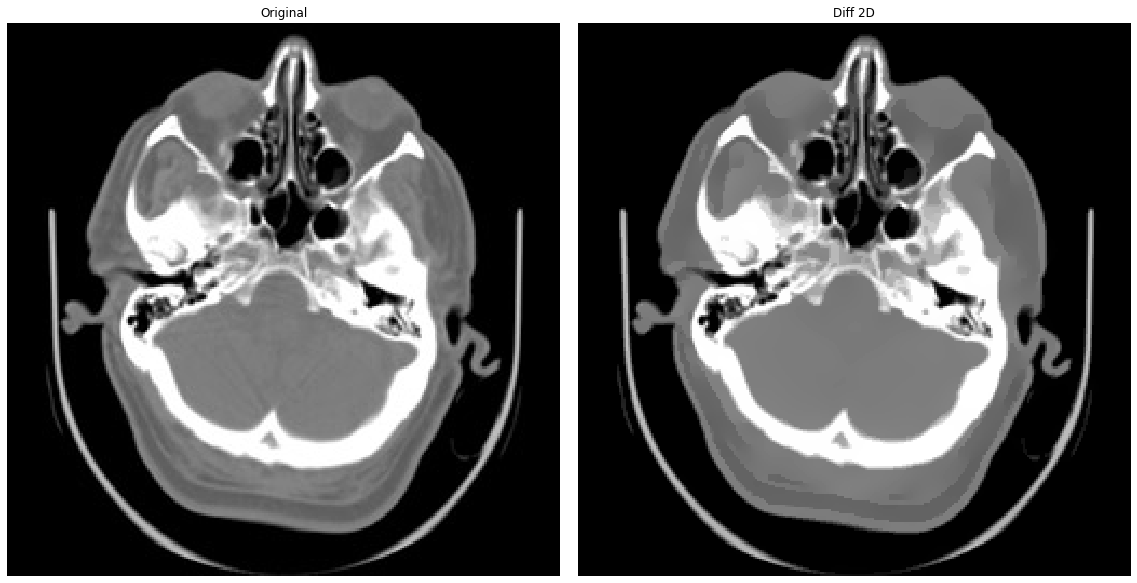

In [10]:
from ipywidgets import interact, interactive, interact_manual
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.morphology import watershed
import cv2
import copy
import numpy as np
from PIL import Image
# Import the anisotropic filter 
from fastaniso import *

image = cv2.imread("../data/ct-02.jpg", cv2.IMREAD_GRAYSCALE)

#image = cv2.imread("../data/car-01.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def my_fastaniso2D(niter=100,kappa=5,gamma=0.1,step=1.,option='equation #1'):
    global image
    if (option == 'equation #1'):
        option = 1
    else:
        option = 2
    output = anisodiff(image, niter=niter,kappa=kappa, gamma=gamma, step=(step,step), option=option, ploton=False)

    fig, axes = plt.subplots(ncols=2, figsize=(16, 8), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')

    # Plot regions using selected colormap...
    ax[1].imshow(output, cmap=plt.cm.gray)
    ax[1].set_title('Diff 2D')
    for a in ax:
        a.set_axis_off()
    fig.tight_layout()
    plt.show()

    
if _ON_COLAB:
    # Google Colab:
    my_fastaniso2D(niter=100,kappa=5,gamma=0.1,step=1.,option='equation #1')
else:
    # Jupyter Notebook:
    interact_manual(my_fastaniso2D, niter=(1, 10000), kappa=(1, 100), gamma=(0.01, 1.), step=(1., 10.), option=['equation #1', 'equation #2'])

![banner Creative Commons INCoD UFSC](http://www.lapix.ufsc.br/wp-content/uploads/2019/05/cc.png)
